Algoritmos

In [ ]:
''' 
PGCC006 - ATIVIDADE1 - MARCOS MORAIS DE SOUSA
Implemente três algoritmos em Python para identificar se todos os elementos de uma lista são únicos. 
Um dos algoritmos deve ser baseado no método força bruta, os demais algoritmos devem ter complexidade n*log(n) e n. 
Todos os algoritmos devem ser implementados em Python (sem utilizar nenhuma biblioteca externa)
Eles devem receber como parâmetro uma lista de elementos e devem retornar verdadeiro, 
quando todos os elementos da lista forem únicos, e falso, caso contrário. 

Você deve enviar o código dos três algoritmos (arquivo único no formato de texto, 
contendo apenas o código dos algoritmos) e uma figura que demonstra o desempenho 
dos três algoritmos para listas com diferentes tamanhos. 
A figura deve permitir evidenciar o desempenho de cada algoritmo. 
Segue em anexo um notebook para auxiliar na obtenção dos gráfico.
'''
def unique_Naive(L):
    for i in range(len(L)-1):           #I inicia em 0 e vai até o tamanho de L-1
        for j in range(i+1,len(L)):     #J inicia en i+1 e vai até o tamanho de L
            if L[i] == L[j]: 
                return False
    return True

def unique_Sort(L):
    A = sorted(L)                       #Em sort você altera a lista, em sorted você tem um valor que pode utilizar em uma variável nova 
    for i in range(len(A) - 1): 
        if(A[i] == A[i + 1]): 
            return False 
    return True 

def unique_Hash(L):
    H = set()                           #criar HasSet H
    for i in range(len(L)):             #percorrer elemento em L
        if L[i] in H:                   #se o item i no hash H for verdade...
            return False                #retornar False
        H.add(L[i])                     #adcionar elemento em H
    return True
  

Coleta de dados dos experimentos

In [ ]:
import time
from numpy import random
DOMAIN = 1000000 ##Você deve escolher um domínio mais adequado
def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain, size=tam))
 
    start = time.time()    
    func(L)
    end = time.time()
    sum += end-start
  return sum/rounds

#defines the algorithms to be processed
algorithms = [unique_Naive, unique_Sort, unique_Hash]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 1000 

sizes = [500,1000,1500,2000,2500] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting round 1, size=500
Starting round 2, size=1000
Starting round 3, size=1500
Starting round 4, size=2000
Starting round 5, size=2500
Finish data collection


Formata os dados do experimento para serem exibidos

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
unique_Naive##500,0.011046,unique_Naive,500
unique_Sort##500,0.000158,unique_Sort,500
unique_Hash##500,0.000112,unique_Hash,500
unique_Naive##1000,0.037372,unique_Naive,1000
unique_Sort##1000,0.000330,unique_Sort,1000
unique_Hash##1000,0.000192,unique_Hash,1000
unique_Naive##1500,0.064681,unique_Naive,1500
unique_Sort##1500,0.000484,unique_Sort,1500
unique_Hash##1500,0.000248,unique_Hash,1500
unique_Naive##2000,0.084761,unique_Naive,2000


Resultado do experimento (gráfico)

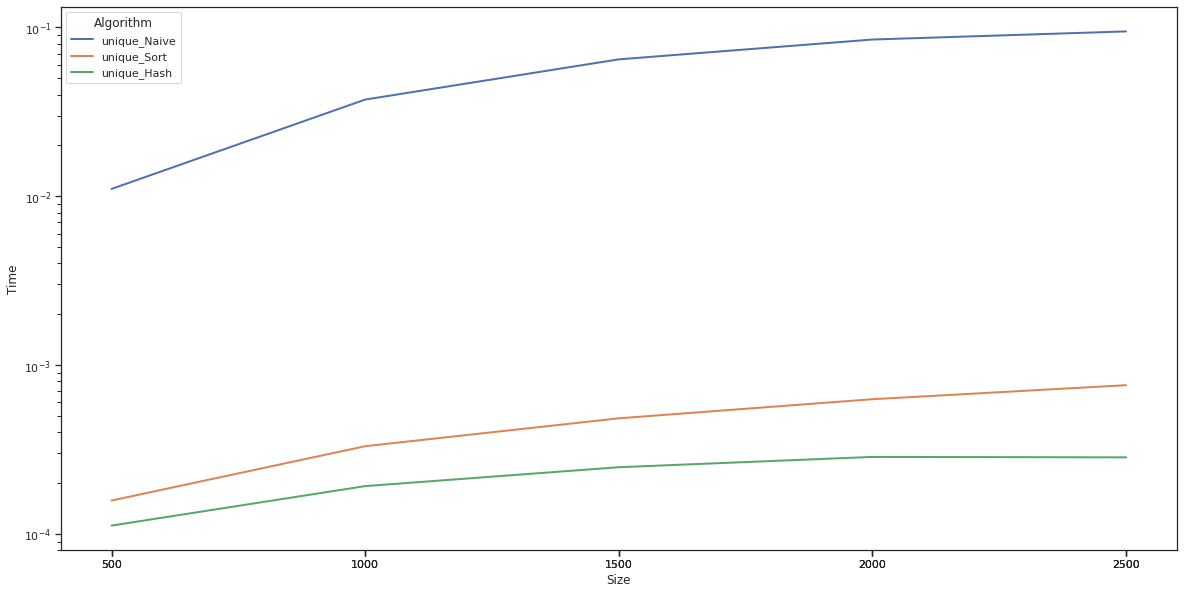

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()